In [69]:
import os
import sys

current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [70]:
from treemort.utils.config import setup

config_file_path = "../configs/flair_unet_bs8_cs256.txt"
conf = setup(config_file_path)

# Modified Config Variables for Local Execution; comment on HPC
conf.data_folder = "/Users/anisr/Documents/USA2Finland/model55_350"
conf.output_dir = os.path.join("..", conf.output_dir)
conf.hdf5_file = 'fake_B.h5'
conf.resume = False

print(conf)

2024-10-18 09:45:43,767 - INFO - Using config file: ../configs/flair_unet_bs8_cs256.txt
2024-10-18 09:45:43,776 - INFO - Configuration successfully loaded.


Namespace(model='flair_unet', backbone=None, model_weights='best', learning_rate=0.0001, activation='sigmoid', loss='hybrid', threshold=0.5, class_weights=[0.1, 0.9], epochs=100, train_batch_size=8, val_batch_size=8, test_batch_size=8, train_crop_size=256, val_crop_size=256, test_crop_size=256, val_size=0.0, test_size=1.0, resume=False, data_folder='/Users/anisr/Documents/USA2Finland/model55_350', hdf5_file='fake_B.h5', input_channels=4, output_channels=1, output_dir='../output/flair_unet')


In [68]:
from treemort.main import run

eval_only = True

run(conf, eval_only)

2024-10-18 09:45:46,611 - INFO - Output directory already exists: ../output/flair_unet
2024-10-18 09:45:46,612 - INFO - Using device: cpu
2024-10-18 09:45:46,613 - INFO - Preparing datasets...
2024-10-18 09:45:46,914 - INFO - Datasets prepared: Train(0), Val(0), Test(140)
2024-10-18 09:45:46,915 - INFO - Loading or resuming model...
2024-10-18 09:45:46,915 - INFO - Building model...
2024-10-18 09:45:47,851 - INFO - flair_unet model configured.
2024-10-18 09:45:47,853 - INFO - Model successfully moved to cpu.
2024-10-18 09:45:47,854 - INFO - Adam optimizer configured with learning rate 0.0001.
2024-10-18 09:45:47,855 - INFO - Hybrid loss and metrics (IOU, F-Score) configured.
2024-10-18 09:45:47,943 - INFO - Loaded weights from ../output/flair_unet/best.weights.pth.
2024-10-18 09:45:47,944 - INFO - Model, optimizer, criterion, metrics, and callbacks are set up.
2024-10-18 09:45:47,945 - INFO - Evaluation-only mode started.
Evaluating: 100%|██████████| 140/140 [02:25<00:00,  1.04s/it, it

### Optional. Plot samples

In [113]:
import torch

from treemort.data.loader import prepare_datasets
from treemort.modeling.builder import resume_or_load
from treemort.evaluation.evaluator import evaluator

id2label = {0: "alive", 1: "dead"}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset, val_dataset, test_dataset = prepare_datasets(conf)

model, optimizer, criterion, metrics, callbacks = resume_or_load(conf, id2label, len(train_dataset), device)

2024-10-18 10:12:24,026 - INFO - Building model...
2024-10-18 10:12:24,921 - INFO - flair_unet model configured.
2024-10-18 10:12:24,924 - INFO - Model successfully moved to cpu.
2024-10-18 10:12:24,924 - INFO - Adam optimizer configured with learning rate 0.0001.
2024-10-18 10:12:24,925 - INFO - Hybrid loss and metrics (IOU, F-Score) configured.
2024-10-18 10:12:24,996 - INFO - Loaded weights from ../output/flair_unet/best.weights.pth.


2024-10-18 10:16:51,974 - INFO - Building model...
2024-10-18 10:16:52,838 - INFO - flair_unet model configured.
2024-10-18 10:16:52,840 - INFO - Model successfully moved to cpu.
2024-10-18 10:16:52,841 - INFO - Adam optimizer configured with learning rate 0.0001.
2024-10-18 10:16:52,841 - INFO - Hybrid loss and metrics (IOU, F-Score) configured.
2024-10-18 10:16:52,914 - INFO - Loaded weights from ../output/flair_unet/best.weights.pth.


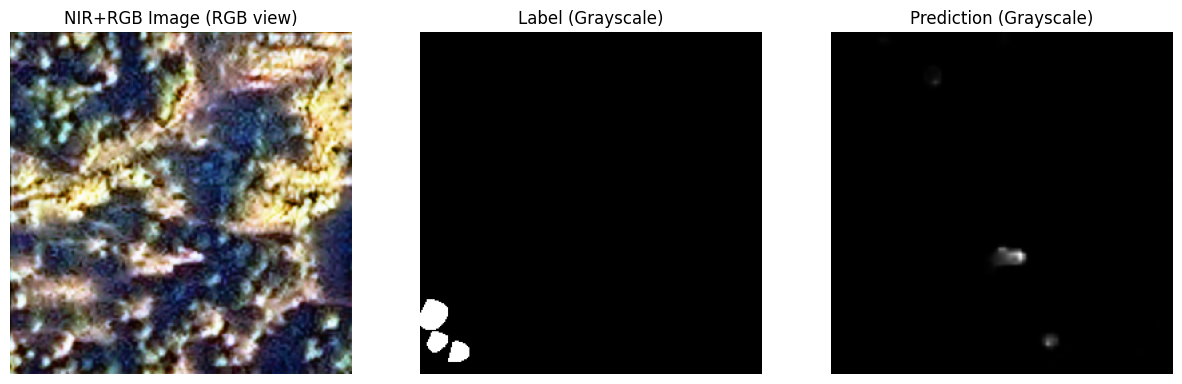

In [114]:
import torch
import matplotlib.pyplot as plt

model.eval()

images, labels = next(iter(test_dataset))

with torch.no_grad():
    outputs = model(images)
    predictions = torch.sigmoid(outputs)

first_image = images[0]
first_label = labels[0]
first_prediction = predictions[0]

rgb_image = first_image[1:, :, :].permute(1, 2, 0).cpu().numpy()

label_image = first_label.squeeze().cpu().numpy()
prediction_image = first_prediction.squeeze().cpu().numpy()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rgb_image)
axes[0].set_title("NIR+RGB Image (RGB view)")
axes[0].axis('off')

axes[1].imshow(label_image, cmap='gray')
axes[1].set_title("Label (Grayscale)")
axes[1].axis('off')

axes[2].imshow(prediction_image, cmap='gray')
axes[2].set_title("Prediction (Grayscale)")
axes[2].axis('off')

plt.show()